# Mandelbrot set
This notebook generates the results used in the report for the first assignment of the course 'Stochastic Simulation'.

**Authors**:

1. Divyaben Hasmukhbhai Gajera
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: divya.gajera@student.uva.nl
- Student Number: 14932644

2. K. López
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: kenia.lopez.sotomayor@student.uva.nl
- Student Number: 12965081

2. T. P. Glansdorp
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: thomas.glansdorp@student.uva.nl
- Student Number: 12748587

## Section 1: Implementation


In [69]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from scipy import stats

The Mandelbrot set is the set of those complex numbers c for which the function z = z * z + c does not go to infinite. 
A high number of iterations indicates slower divergence and a point that stays within bounds. 
This means that for these points, the iterative function z takes more iterations before determining that the point diverges and moves away from the set.

https://github.com/KeniaLS/Stoc_Sim_Assignment1.gitgit 

Approximated area of the Mandelbrot set: 1.52027775
The number total number of points within the set: 675679


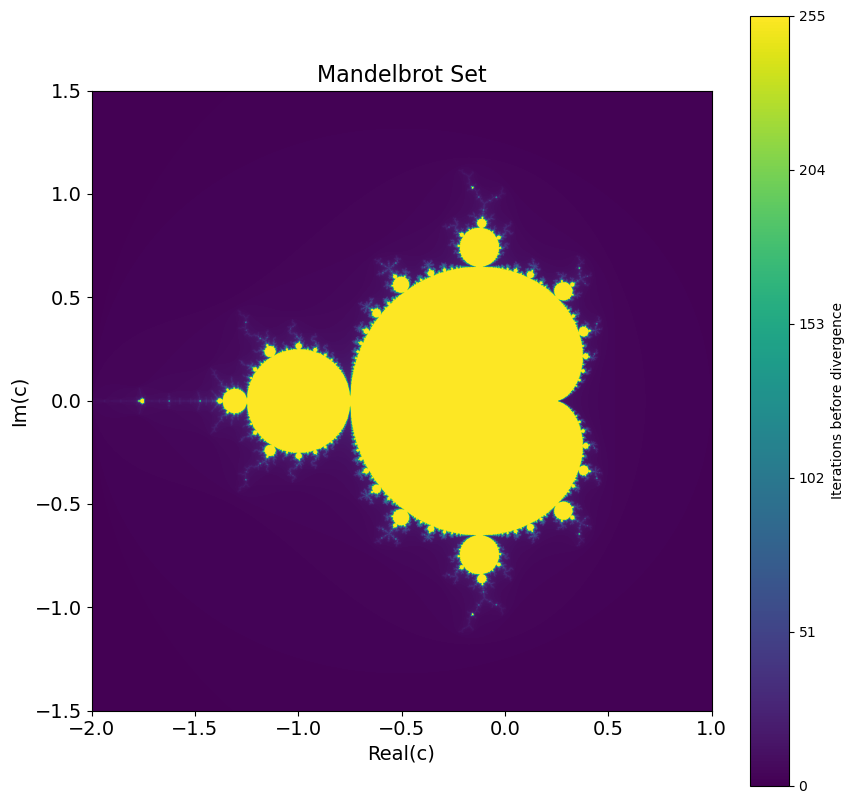

In [70]:
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        z = z * z + c
        if abs(z) > 2:
            return False, n  # Point is not in the Mandelbrot set, return boolean and iterations
    return True, max_iter  # Point is in the Mandelbrot set, return boolean and max_iter

def mandelbrot_plot():
    max_iter = 255
    x_min, x_max = -2.0, 1.0
    y_min, y_max = -1.5, 1.5
    width, height = 2000, 2000

    total_points = width * height
    points_inside_set = 0

    mandelbrot_image = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            real = x * (x_max - x_min) / (width - 1) + x_min
            imag = y * (y_max - y_min) / (height - 1) + y_min
            c = complex(real, imag)

            in_mandelbrot, iterations = mandelbrot(c, max_iter)
            mandelbrot_image[x, y] = iterations

            if in_mandelbrot:
                points_inside_set += 1

    area_ratio = points_inside_set / total_points
    total_area = (x_max - x_min) * (y_max - y_min)
    estimated_area = area_ratio * total_area
    AREA = estimated_area

    print(f"Approximated area of the Mandelbrot set: {AREA}")
    print(f"The number total number of points within the set: {points_inside_set}")

    plt.figure(figsize=(10, 10))
    img = plt.imshow(mandelbrot_image.T, cmap='viridis', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Real(c)', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Im(c)', fontsize=14)
    plt.title('Mandelbrot Set', fontsize=16)
    colorbar = plt.colorbar(img, label='Iterations before divergence')
    colorbar.set_ticks(np.arange(0, max_iter+1, max_iter//5))  # Adjust the tick positions
    plt.show()

mandelbrot_plot()

# MonteCarlo Integration

In [71]:
def calculate_area(samples, iters, type_sampling):
    
    area_square = 3*3                ## area of the square in which we are taking a samples
    num_points_mandel = 0
    if type_sampling == "Random":
        points = random_sampling(samples)
    elif type_sampling == "LHC":
        points = latin_hypercube_sampling(samples)
        #x_points, y_points = points[0], points[1]
    elif type_sampling == "Orthogonal":
        points = orthogonal_sampling(int(round(np.sqrt(samples))))
        #x_points, y_points = points[0], points[1]
    elif type_sampling == "Antithetic":
        pass
    for x,y in points:
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot:
            num_points_mandel += 1
    area = num_points_mandel * area_square /samples 
    
    return area

In [72]:
def iterations_vs_area(max_iterations, no_samples, method):
    print(max_iterations)
    num_iters= range(1, max_iterations, 2)     ## range of values for changing the No. of iterations
    based_iter    = []
    for iters in num_iters:
        area = calculate_area(no_samples, iters,method)
        based_iter.append(area)
        
    return  num_iters, based_iter
            
    

In [73]:
def random_sampling(no_samples):
    
    x_point = uniform.rvs(-2, 3, size=no_samples)
    y_point = uniform.rvs(-1.5, 3, size=no_samples)

    return np.column_stack((x_point, y_point))

## Convergence as Number of Iterations Increases

In [74]:
number_samples = 500
max_iter = 700
iteration_random, estimated_area = iterations_vs_area(max_iter, number_samples, "Random")

700


Text(0, 0.5, 'Area of Mandelbrot')

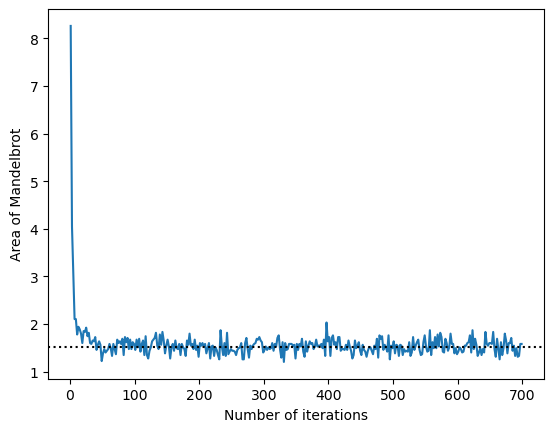

In [75]:
plt.plot(iteration_random, estimated_area)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Area of Mandelbrot")

## Convergence as Number of Samples Increases

In [76]:
def samples_vs_area(max_samples, no_iter, type_sampling):
    
    num_samples = range(10, max_samples, 50)     ## range of values for changing the Sample size
    based_sample = []
    for samples in num_samples:
        area = calculate_area(samples, no_iter, type_sampling)
        based_sample.append(area)
    return num_samples, based_sample
        
        

Text(0, 0.5, 'Area of Mandelbrot')

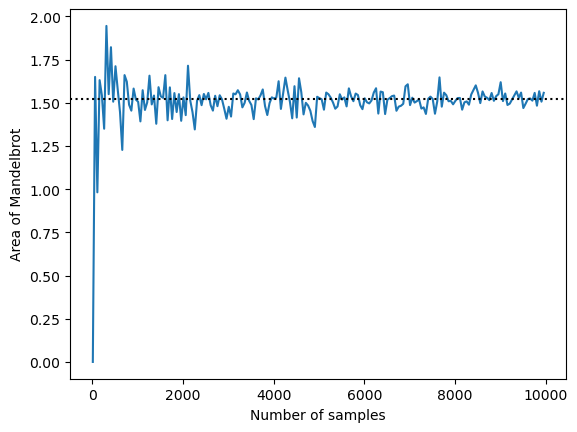

In [77]:
max_samples = 10000
no_iter = 400
type_sampling = "Random"
samples_index, based_sample = samples_vs_area(max_samples, no_iter, type_sampling)
plt.plot(samples_index, based_sample)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of samples")
plt.ylabel("Area of Mandelbrot")

# Error Calculation

In [78]:
def estimated_area(num_simulations,no_sample, no_iter,type_sampling):
    
    areas = []
    for _ in range(num_simulations):
        area = calculate_area(no_sample, no_iter, type_sampling)
        areas.append(area)
    est_area = np.mean(np.array(areas))
    std = np.std(np.array(areas))
    
    return est_area, std
    

In [79]:
no_iter = 300
no_sample = 6000
num_simulations = 100
etimate_A_random, std_random = estimated_area(num_simulations,no_sample, no_iter,"Random")
print(f"Mean Area of Mandelbrot for Iterations = {no_iter} and Samples = {no_sample}: {etimate_A_random}")
print(f"Standard deviation of Mandelbrot for Iterations = {no_iter} and Samples = {no_sample}: {std_random}")

Mean Area of Mandelbrot for Iterations = 300 and Samples = 6000: 1.5219600000000002
Standard deviation of Mandelbrot for Iterations = 300 and Samples = 6000: 0.04332976344269606


## Number of iteration changes

In [81]:
def error_iter(max_iterations,no_sample, type_sampling, etimate_Area):
    
    iter_error    = []
    num_iters = range(1, max_iterations, 2)     ## range of values for changing the No. of iterations
    for iters in num_iters:
        area = calculate_area(no_sample, iters, type_sampling)
        iter_error.append(np.abs(area - etimate_Area))
    
    return num_iters, iter_error

In [82]:
num_iters, error_random = error_iter(300, 6000,"Random", etimate_A_random)

Text(0.5, 0, 'Number of Iterations')

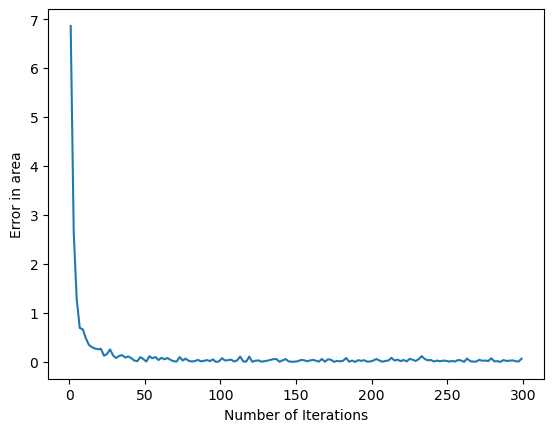

In [83]:
plt.plot(num_iters, error_random)
plt.ylabel("Error in area")
plt.xlabel("Number of Iterations")

## Number of samples changes

In [84]:
def error_samples(no_iterations,max_sample, type_sampling, etimate_Area):
    
    sample_error    = []
    sample_num = range(1, max_sample, 50)     ## range of values for changing the No. of iterations
    for sample in sample_num:
        area = calculate_area(sample, no_iterations, type_sampling)
        sample_error.append(np.abs(area - etimate_Area))
    
    return sample_num, sample_error

In [85]:
num_samp, error_sample_r = error_samples(300, 6000,"Random", etimate_A_random)

Text(0.5, 0, 'Number of Samples')

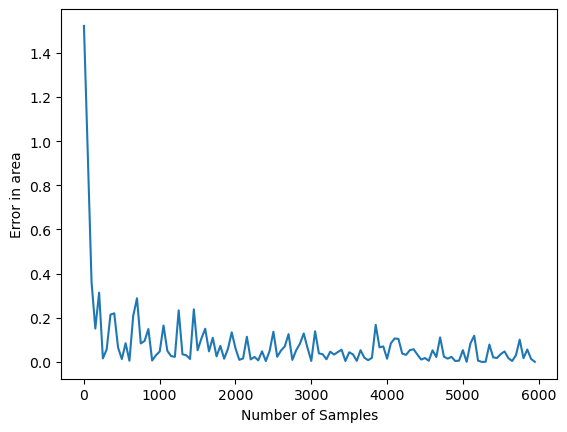

In [86]:
plt.plot(num_samp, np.array(error_sample_r))
plt.ylabel("Error in area")
plt.xlabel("Number of Samples")

## Latin Hypercube Sampling

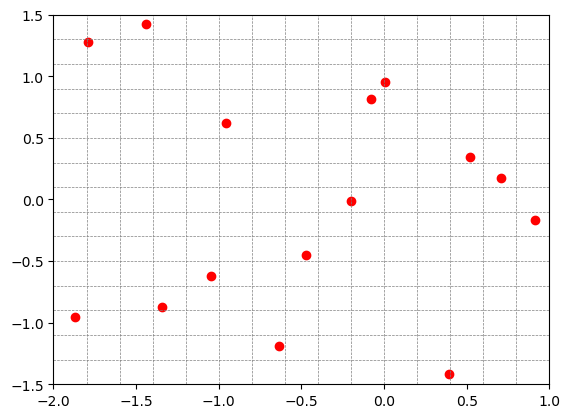

In [87]:

def latin_hypercube_sampling_and_grid(n, x_range, y_range):
    '''Function that performs Latin hypercube sampling and plots the grid.
    Expects: the number of samples n and the range of the x and y values.
    Modifies: nothing
    Returns: the samples in the grid'''
    x_min, x_max = x_range
    y_min, y_max = y_range
    
    # Generate Latin hypercube samples
    x_points = np.linspace(x_min, x_max, n, endpoint=False) + np.random.uniform(0, (x_max - x_min) / n, n)
    y_points = np.linspace(y_min, y_max, n, endpoint=False) + np.random.uniform(0, (y_max - y_min) / n, n)
    
    # Shuffle the y_points
    np.random.shuffle(y_points)
    
    # Combine x and y points
    points = np.column_stack((x_points, y_points))

    
    plt.figure
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    plt.scatter(points[:,0],points[:,1],c='r')

    dx = abs(x_max - x_min)/n
    dy = abs(y_max - y_min)/n
    
    for i in np.arange(x_min, x_max, dx):
        plt.axvline(i, color='gray', linestyle='--', linewidth=0.5)
    for j in np.arange(y_min, y_max, dy):
        plt.axhline(j, color='gray', linestyle='--', linewidth=0.5)

    plt.show()

# Given dimensions and number of samples
x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 15

# Perform Latin hypercube sampling
samples = latin_hypercube_sampling_and_grid(num_samples, x_range, y_range)

In [89]:

def latin_hypercube_sampling(num_samples):
    '''Function that performs Latin hypercube sampling.
       Expects: number of samples
       Modifies: nothing
       Returns: x and y points. A point that will be or not in the Mandelbrot set'''

    x_range = [-2, 1]
    y_range = [-1.5, 1.5]
    x_min, x_max = x_range
    y_min, y_max = y_range
    
    # Generate Latin hypercube samples
    x_points = np.linspace(x_min, x_max, num_samples, endpoint=False) + np.random.uniform(0, (x_max - x_min) / num_samples, num_samples)
    y_points = np.linspace(y_min, y_max, num_samples, endpoint=False) + np.random.uniform(0, (y_max - y_min) / num_samples, num_samples)
    
    # Shuffle the y_points
    np.random.shuffle(y_points)
    
    # Combine x and y points
    points = np.column_stack((x_points, y_points))
    
    return points

# Perform Latin hypercube sampling
latin_hypercube_sampling(10)



array([[-1.7905495 ,  1.00354625],
       [-1.44938678,  0.86292671],
       [-1.3877723 ,  0.17955933],
       [-0.95707084, -0.91918145],
       [-0.58990989, -1.32844921],
       [-0.35329515, -0.46122251],
       [-0.02784284,  0.40370344],
       [ 0.13339013, -0.07292568],
       [ 0.42556151, -0.60710642],
       [ 0.73020702,  1.38076612]])

## Convergence as the number of iterations increases - LHS

In [90]:
number_samples = 200
max_iter = 1000
iteration_LHC, estimated_area_LHC = iterations_vs_area(max_iter, number_samples, "LHC")

1000


Text(0, 0.5, 'Estimated Area of Mandelbrot with LHS')

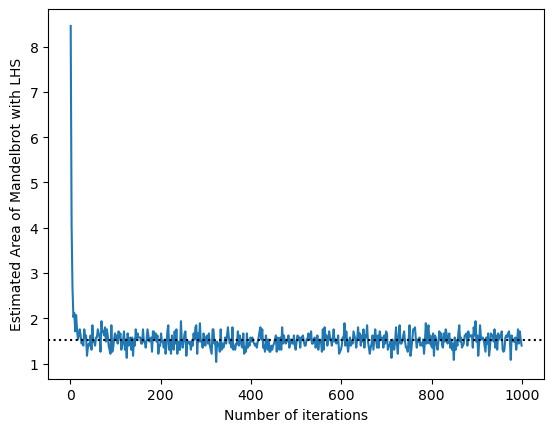

In [91]:
plt.plot(iteration_LHC, estimated_area_LHC)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Estimated Area of Mandelbrot with LHS")

## Convergence as the Number of Samples Increases - LHS

In [92]:
num_samples_LHS, based_sample_LHS = samples_vs_area(10000, 400, "LHC")

Text(0, 0.5, 'Estimated Area of Mandelbrot with LHS')

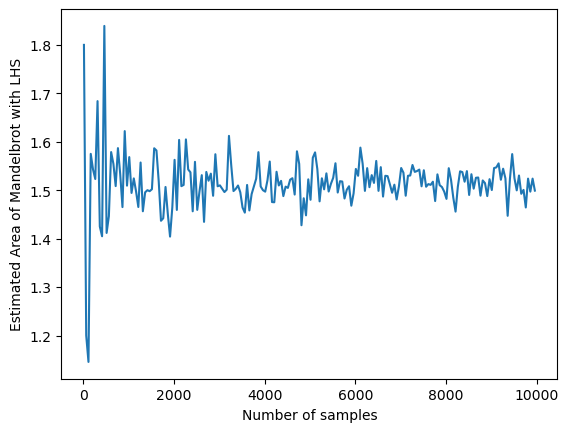

In [93]:
plt.plot(num_samples_LHS, based_sample_LHS)
#plt.axhline(y = 1.5, color = 'k', linestyle = ':') 
plt.xlabel("Number of samples")
plt.ylabel("Estimated Area of Mandelbrot with LHS")

#### Error as Iterations Increases

In [267]:
no_iter = 300
no_sample = 5000
num_simulations = 100
etimate_A_LHC, std_LHC = estimated_area(num_simulations,no_sample, no_iter,"LHC")
print(f"Mean Area of Mandelbrot for Iterations = {no_iter} and Samples = {no_sample}: {etimate_A_LHC}")
print(f"Standard deviation of Mandelbrot for Iterations = {no_iter} and Samples = {no_sample}: {std_LHC}")

Mean Area of Mandelbrot for Iterations = 300 and Samples = 5000: 1.521972
Standard deviation of Mandelbrot for Iterations = 300 and Samples = 5000: 0.03266434165875688


In [95]:
num_iters_LHC, error_iter_LHC = error_iter(300, 6000,"LHC", etimate_A_LHC)

Text(0.5, 0, 'Number of Iterations')

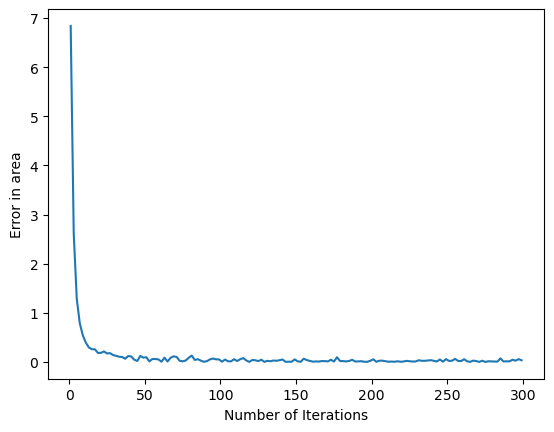

In [233]:
plt.plot(num_iters_LHC, error_iter_LHC, label =  "LHC")
plt.ylabel("Error in area")
plt.xlabel("Number of Iterations")


##### Error as Samples Increases

In [97]:
num_samp, error_sample_LHC = error_samples(300,6000,"LHC", etimate_A_LHC)

Text(0.5, 0, 'Number of Samples')

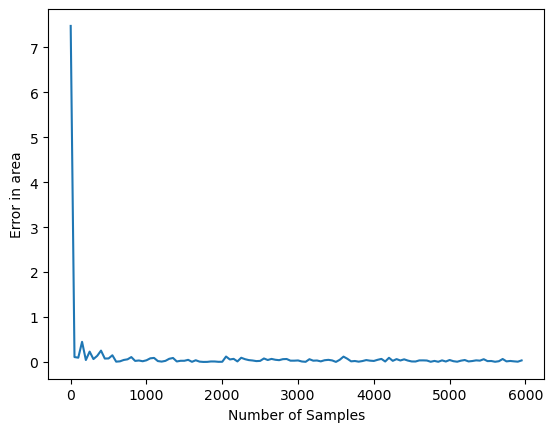

In [98]:
plt.plot(num_samp, error_sample_LHC, label ="LHC")
plt.ylabel("Error in area")
plt.xlabel("Number of Samples")

## Orthogonal Sampling

In [99]:

def orthogonal_sampling(MAJOR):
    xlist = np.zeros((MAJOR, MAJOR), dtype=int)
    ylist = np.zeros((MAJOR, MAJOR), dtype=int)
    SAMPLES = MAJOR * MAJOR
    scale = 3.0 / SAMPLES

    np.random.seed(3737)
    m = 0
    xl_p = []
    yl_p = []

    for i in range(MAJOR):
        for j in range(MAJOR):
            xlist[i][j] = ylist[i][j] = m
            m += 1

    for _ in range(1):
        
        for i in range(MAJOR):
            random.shuffle(xlist[i])
            random.shuffle(ylist[i])

        for i in range(MAJOR):             # Subsquare column
            for j in range(MAJOR):         # Subsquare row
                x = -2.0 + scale * (xlist[i][j] + np.random.random())
                y = -1.5 + scale * (ylist[j][i] + np.random.random())
            
                xl_p.append(x)
                yl_p.append(y)
                
    return np.column_stack((np.array(xl_p), np.array(yl_p)))


##### Convergence As Number of Iteration Increases for orthogonal Sampling

In [268]:
max_iter= 400
number_samples = 250
iter_index_ortho, area_ortho = iterations_vs_area(max_iter, number_samples, "Orthogonal")


400


Text(0.5, 0, 'Number of Iterations')

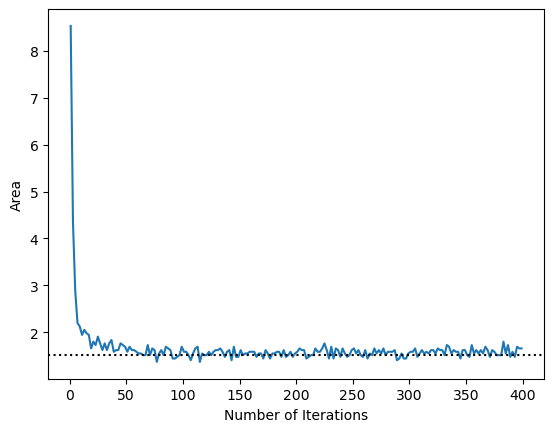

In [269]:
plt.plot(iter_index_ortho, area_ortho)
plt.axhline(y = 1.52, color = 'k', linestyle = ':')
plt.ylabel("Area")
plt.xlabel("Number of Iterations")

##### Convergence As Number of samples Increases for orthogonal Sampling

In [272]:
num_samples_ortho, based_sample_ortho = samples_vs_area(10000, 250, "Orthogonal")

Text(0.5, 0, 'Number of Samples')

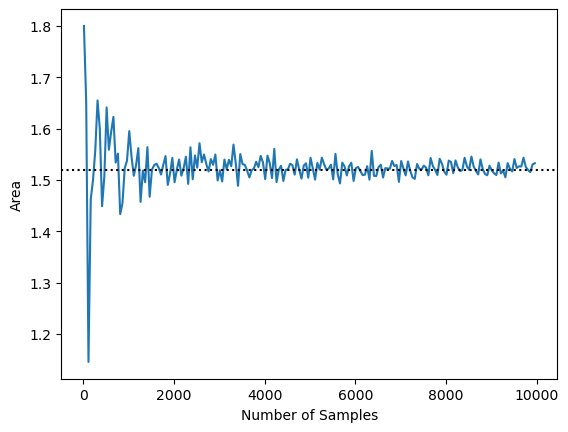

In [273]:
plt.plot(num_samples_ortho, based_sample_ortho)
plt.axhline(y = 1.52, color = 'k', linestyle = ':')
plt.ylabel("Area")
plt.xlabel("Number of Samples")

#### Error As Iterations increases in Orthogonal

In [274]:
no_iter = 250
no_sample = 6000
num_simulations = 100
etimate_A_ortho, std_ortho = estimated_area(num_simulations,no_sample, no_iter,"Orthogonal")
print(f"Mean Area of Mandelbrot for Iterations = {no_iter} and Samples = {no_sample}: {etimate_A_ortho}")
print(f"Standard deviation of Mandelbrot for Iterations = {no_iter} and Samples = {no_sample}: {std_ortho}")

Mean Area of Mandelbrot for Iterations = 250 and Samples = 6000: 1.5033599999999998
Standard deviation of Mandelbrot for Iterations = 250 and Samples = 6000: 0.008103110513870587


In [275]:
num_iters_ortho, error_iter_ortho = error_iter(250, 6000,"Orthogonal", etimate_A_ortho)

Text(0.5, 0, 'Number of Samples')

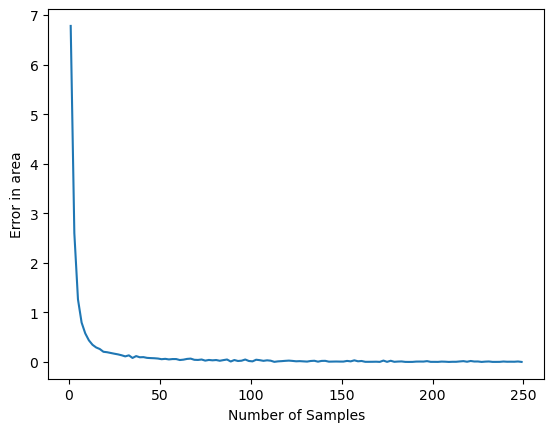

In [276]:
plt.plot(num_iters_ortho, error_iter_ortho, label ="Orthogonal")
plt.ylabel("Error in area")
plt.xlabel("Number of Samples")

#### Error As Samples increases in Orthogonal

In [278]:
num_samp_ortho, error_sample_ortho = error_samples(250,6000,"Orthogonal", etimate_A_ortho)

Text(0.5, 0, 'Number of Samples')

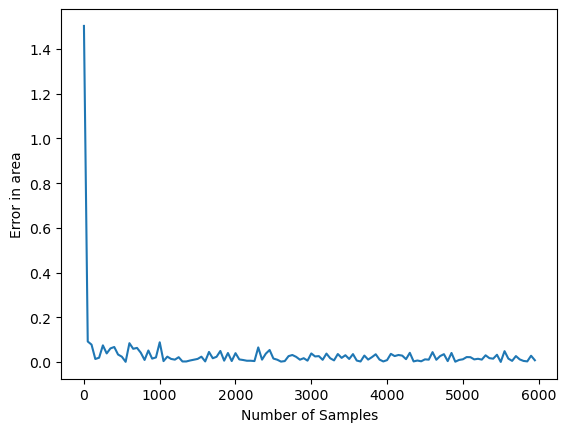

In [279]:
plt.plot(num_samp_ortho, error_sample_ortho, label ="Orthogonal")
plt.ylabel("Error in area")
plt.xlabel("Number of Samples")

### Confidence interval 

In [280]:
def confidence_interval(max_samples, num_iterations, type_sampling):
    num_samples = range(500, max_samples, 500)            ## range of values for changing the No. of iterations
    num_samples = [x**2 for x in range(10, int(round(np.sqrt(16000))), 4)]
    mean_ev = []
    ci_ev = []
    for samples in num_samples:
        temp_eval = []
        for _ in range(50):
            area = calculate_area(samples, num_iterations, type_sampling)
            temp_eval.append(area)
        sd_sample = np.std(np.array(temp_eval))
        ci_sample = 1.96 * sd_sample / np.sqrt(50)
        mean_sample = np.mean(np.array(temp_eval))
        ci_ev.append(ci_sample)
        mean_ev.append(mean_sample)
    return ci_ev, mean_ev, num_samples

#### CI for Orthogonal sampling

In [281]:
ci_ortho, mean_ortho, samp_ortho = confidence_interval(16000, 250, 'Orthogonal')

In [282]:
print(f"Minimum CI for Orthogonal Sampling: ({mean_ortho[-1] - ci_ortho[-1]}, {mean_ortho[-1] + ci_ortho[-1]})")
print(f"Minimum size of Interval for Orthogonal Sampling: {2*ci_ortho[-1]}")

Minimum CI for Orthogonal Sampling: (1.5200768933104918, 1.5226293684471006)
Minimum size of Interval for Orthogonal Sampling: 0.0025524751366090477


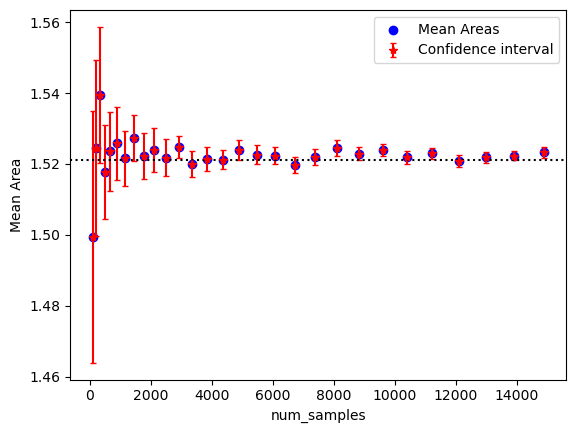

In [322]:
plt.scatter(samp_ortho, mean_ortho, label='Mean Areas', color='blue')
plt.errorbar(samp_ortho, mean_ortho, yerr=ci_ortho, fmt='*', color='red', capsize=2, label='Confidence interval')
plt.axhline(y = 1.521, color = 'k', linestyle = ':')
plt.xlabel('num_samples')
plt.ylabel('Mean Area')
plt.legend()
plt.show()

#### CI For Random Sampling

In [114]:
ci_random, mean_random, samp_random = confidence_interval(16000, 300, 'Random')

In [257]:
print(f"Minimum CI for Random Sampling: ({mean_random[-1] - ci_random[-1]}, {mean_random[-1] + ci_random[-1]})")
print(f"Minimum size of Interval for Random Sampling: {2*ci_random[-1]}")

Minimum CI for Random Sampling: (1.5218609377869061, 1.53726832853935)
Minimum size of Interval for Random Sampling: 0.015407390752443743


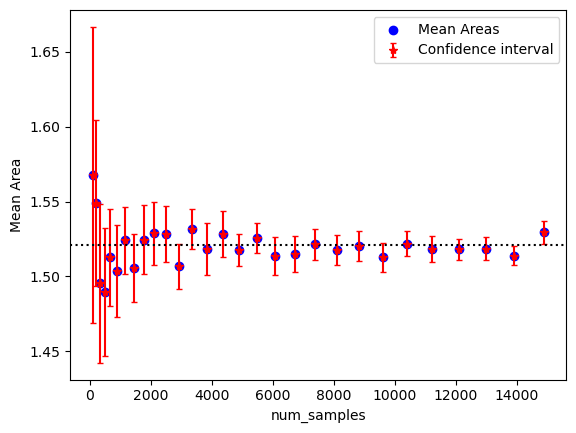

In [116]:
plt.scatter(samp_random, mean_random, label='Mean Areas', color='blue')
plt.errorbar(samp_random, mean_random, yerr=ci_random, fmt='*', color='red', capsize=2, label='Confidence interval')
plt.axhline(y = 1.521, color = 'k', linestyle = ':')
plt.xlabel('num_samples')
plt.ylabel('Mean Area')
plt.legend()

#### CI for Latin Hypercube Sampling

In [117]:
ci_LHC, mean_LHC, samp_LHC = confidence_interval(16000, 300, 'LHC')

In [253]:
print(f"Minimum CI for LHC Sampling: ({mean_LHC[-1] - ci_LHC[-1]}, {mean_LHC[-1] + ci_LHC[-1]})")
print(f"Minimum size of Interval for Latin Sampling: {2*ci_LHC[-1]}")

Minimum CI for LHC Sampling: (1.515068776923382, 1.524759226301558)
Minimum size of Interval for Latin Sampling: 0.009690449378176097


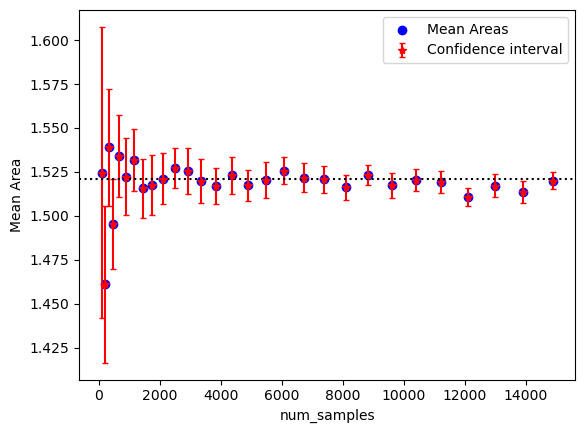

In [119]:
plt.scatter(samp_LHC, mean_LHC, label='Mean Areas', color='blue')
plt.errorbar(samp_LHC, mean_LHC, yerr=ci_LHC, fmt='*', color='red', capsize=2, label='Confidence interval')
plt.axhline(y = 1.521, color = 'k', linestyle = ':')
plt.xlabel('num_samples')
plt.ylabel('Mean Area')
plt.legend()


## Antithetic Variates 

In [127]:
num_iters= range(1, 700, 2)     ## range of values for changing the No. of iterations
samples  = 200                  ## sample size
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
area_square = 3*3 
              
based_iter_anti    = []
based_iter_U = []
based_iter_Ui = []

for iters in num_iters:
    num_points_mandel = 0
    num_points_mandel_U = 0
    num_points_mandel_Ui = 0
    count = 0

    while count < samples:
        x_point = uniform.rvs(-2, 3, size=1)
        y_point = uniform.rvs(-1.5, 3, size=1)
        c = complex(x_point, y_point)
        in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
            num_points_mandel_U += 1

        anti_x_point = (x_min+x_max) - x_point
        anti_y_point = (y_min+y_max) - y_point
        anti_c = complex(anti_x_point, anti_y_point)

        in_mandelbrot_anti, _ = mandelbrot(anti_c, iters)
        if in_mandelbrot_anti == True:
            num_points_mandel += 1
            num_points_mandel_Ui += 1
        
        count += 2


    area = num_points_mandel * area_square/samples
    area_U = num_points_mandel_U * area_square/(samples/2)
    area_Ui = num_points_mandel_Ui * area_square/(samples/2)
    based_iter_anti.append(area)  
    based_iter_Ui.append(area_Ui)
    based_iter_U.append(area_U)

    

Text(0, 0.5, 'Estimated Area of Mandelbrot')

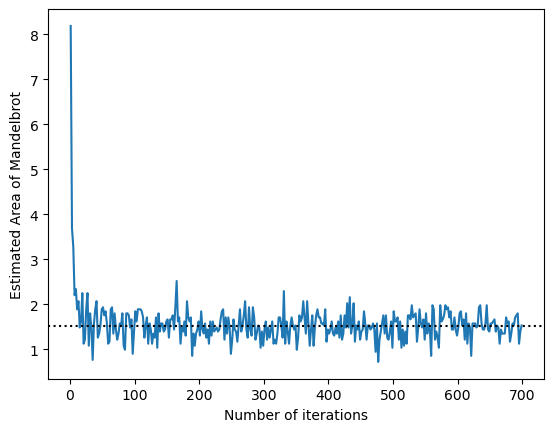

In [128]:
plt.plot(num_iters, based_iter_anti)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Estimated Area of Mandelbrot")

Antithetic sample variet

In [135]:
num_samples = range(10, 10000, 100)     ## range of values for changing the Sample size
num_iters = 300                       ## Number of iterations 
              
based_sample_anti = []
based_sample_U = []
based_sample_Ui = []

for samples in num_samples:
    num_points_mandel = 0
    num_points_mandel_U = 0
    num_points_mandel_Ui = 0
    count = 0

    while count < samples:
        x_point = uniform.rvs(-2, 3, size=1)
        y_point = uniform.rvs(-1.5, 3, size=1)
        c = complex(x_point, y_point)
        in_mandelbrot, _ = mandelbrot(c, num_iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
            num_points_mandel_U += 1

        anti_x_point = (x_min+x_max) - x_point
        anti_y_point = (y_min+y_max) - y_point
        anti_c = complex(anti_x_point, anti_y_point)

        in_mandelbrot_anti, _ = mandelbrot(anti_c, num_iters)
        if in_mandelbrot_anti == True:
            num_points_mandel += 1
            num_points_mandel_U += 1
        
        count += 1


    area = num_points_mandel * area_square/samples
    area_U = num_points_mandel_U * area_square/(samples)
    area_Ui = num_points_mandel_Ui * area_square/(samples)
    based_sample_anti.append(area)  
    based_sample_Ui.append(area_Ui)
    based_sample_U.append(area_U)

Text(0, 0.5, 'Estimated Area of Mandelbrot')

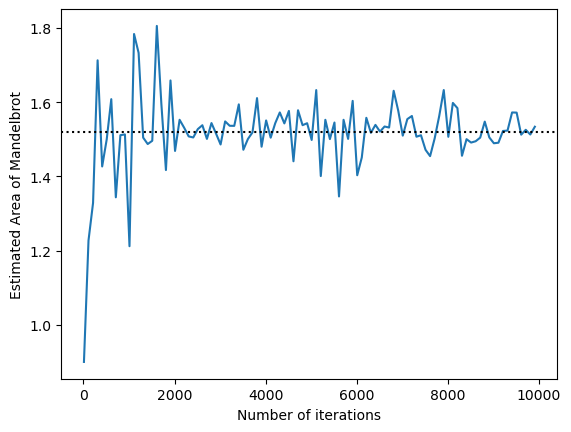

In [136]:
plt.plot(num_samples, based_sample_anti)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Estimated Area of Mandelbrot")


In [137]:
max_iterations = 300
max_samples = 6000
based_error_anti = []
based_error_Ui = []
based_error_U = []


for i in range(100):
    num_points_mandel = 0
    num_points_mandel_U = 0
    num_points_mandel_Ui = 0
    count = 0

    while count < max_samples:
        x_point = uniform.rvs(-2, 3, size=1)
        y_point = uniform.rvs(-1.5, 3, size=1)
        c = complex(x_point, y_point)
        in_mandelbrot, _ = mandelbrot(c, max_iterations)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
            num_points_mandel_U += 1

        anti_x_point = (x_min+x_max) - x_point
        anti_y_point = (y_min+y_max) - y_point
        anti_c = complex(anti_x_point, anti_y_point)

        in_mandelbrot_anti, _ = mandelbrot(anti_c, max_iterations)
        if in_mandelbrot_anti == True:
            num_points_mandel += 1
            num_points_mandel_Ui += 1
        
        count += 2

    area = num_points_mandel * area_square/max_samples
    area_U = num_points_mandel_U * area_square/(max_samples/2)
    area_Ui = num_points_mandel_Ui * area_square/(max_samples/2)
    based_error_anti.append(area)  
    based_error_Ui.append(area_Ui)
    based_error_U.append(area_U)

In [140]:
mean_area_error = np.mean(np.array(based_error_anti))
sd_area_error = np.std(np.array(based_error_U))
var_area_error = 0.5 * np.sqrt(sd_area_error)
print("Mean Area of Mandelbrot for Iterations = 300 and Samples = 6000:", mean_area_error)
print("Standard deviation of Mandelbrot for Iterations = 300 and Samples = 6000:", sd_area_error)
cov_area = np.cov(based_error_U, based_error_Ui)[0, 1]
print(var_area_error)
print(cov_area)
var_area_cov = 0.5 * np.sqrt(sd_area_error) + 0.5 * cov_area
print(f"Variance between samples: {var_area_cov}")

Mean Area of Mandelbrot for Iterations = 300 and Samples = 6000: 1.516395
Standard deviation of Mandelbrot for Iterations = 300 and Samples = 6000: 0.06204464199268138
0.12454380955378852
0.0015336763636363648
0.1253106477356067


#### Error calculation for Antithetic sampling

In [141]:
num_iters= range(1, max_iterations, 2)     ## range of values for changing the No. of iterations
iter_error_anti = []

for iters in num_iters:
    num_points_mandel = 0
    count = 0

    while count < max_samples:
        x_point = uniform.rvs(-2, 3, size=1)
        y_point = uniform.rvs(-1.5, 3, size=1)
        c = complex(x_point, y_point)
        in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1

        anti_x_point = (x_min+x_max) - x_point
        anti_y_point = (y_min+y_max) - y_point
        anti_c = complex(anti_x_point, anti_y_point)

        in_mandelbrot_anti, _ = mandelbrot(anti_c, iters)
        if in_mandelbrot_anti == True:
            num_points_mandel += 1

        count += 1

    area = num_points_mandel * area_square/max_samples
    iter_error_anti.append(area - mean_area_error)   

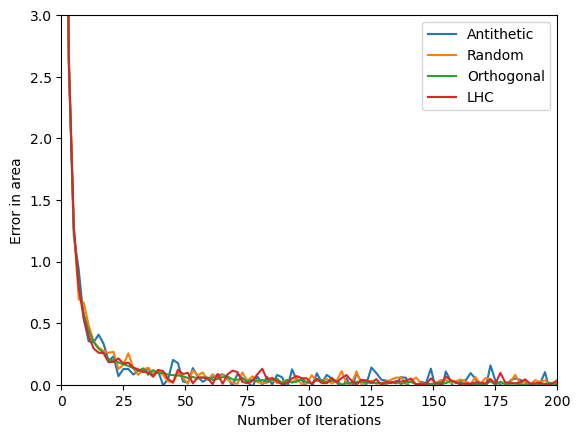

In [290]:
plt.plot(num_iters, iter_error_anti, label ="Antithetic")
plt.plot(num_iters, error_random, label ="Random")
plt.plot(num_iters_ortho, error_iter_ortho, label ="Orthogonal")
plt.plot(num_iters_LHC, error_iter_LHC, label =  "LHC")
plt.ylim([0,3])
plt.xlim([0,200])
plt.legend()
plt.ylabel("Error in area")
plt.xlabel("Number of Iterations")
#plt.savefig("Error_iter.png")

In [146]:
num_samples = range(1, max_samples, 100)     ## range of values for changing the No. of iterations
sample_error_anti = []

for samples in num_samples:
    num_points_mandel = 0
    count = 0

    while count < samples:
        x_point = uniform.rvs(-2, 3, size=1)
        y_point = uniform.rvs(-1.5, 3, size=1)
        c = complex(x_point, y_point)
        in_mandelbrot, _ = mandelbrot(c, max_iterations)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1

        anti_x_point = (x_min+x_max) - x_point
        anti_y_point = (y_min+y_max) - y_point
        anti_c = complex(anti_x_point, anti_y_point)

        in_mandelbrot_anti, _ = mandelbrot(anti_c, max_iterations)
        if in_mandelbrot_anti == True:
            num_points_mandel += 1
        
        count += 2


    area = num_points_mandel * area_square/samples
    sample_error_anti.append(np.abs(area - mean_area_error))  

Text(0.5, 0, 'Number of Samples')

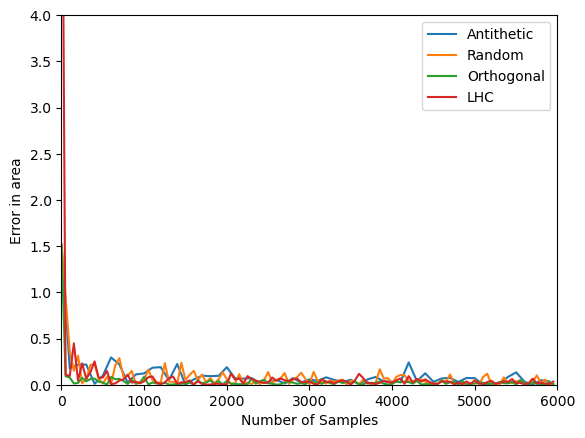

In [291]:
plt.plot(num_samples, sample_error_anti, label='Antithetic')
plt.plot(num_samp, np.array(error_sample_r), label ="Random")
plt.plot(num_samp_ortho, error_sample_ortho, label ="Orthogonal")
plt.plot(num_samp, error_sample_LHC, label ="LHC")

plt.xlim([0,6000])
plt.ylim([0,4])
plt.legend()
plt.ylabel("Error in area")
plt.xlabel("Number of Samples")

### Antithetic Confidence interval

In [241]:
num_samples_anti = range(500, 16000, 500)      ## range of values for changing the Sample size
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
area_square = 3*3

mean_ev_anti = []
ci_ev_anti = []

for samples in num_samples_anti:
    temp_eval_anti = []
    for _ in range(50):
        num_points_mandel = 0
        count = 0

        while count < samples:
            x_point = uniform.rvs(-2, 3, size=1)
            y_point = uniform.rvs(-1.5, 3, size=1)
            c = complex(x_point, y_point)
            in_mandelbrot, _ = mandelbrot(c, 200)  # The second element in the tuple is the number of iterations, which we don't need here
            if in_mandelbrot == True:
                num_points_mandel += 1

            anti_x_point = (x_min+x_max) - x_point
            anti_y_point = (y_min+y_max) - y_point
            anti_c = complex(anti_x_point, anti_y_point)

            in_mandelbrot_anti, _ = mandelbrot(anti_c, 200)
            if in_mandelbrot_anti == True:
                num_points_mandel += 1
            
            count += 2

        area = num_points_mandel * area_square/samples
        temp_eval_anti.append(area)
    
    sd_sample_anti = np.std(np.array(temp_eval_anti))
    ci_sample_anti = 1.96 * sd_sample_anti / np.sqrt(50)
    mean_sample_anti = np.mean(np.array(temp_eval_anti))
    ci_ev_anti.append(ci_sample_anti)
    mean_ev_anti.append(mean_sample_anti)

In [250]:
print(f"Minimum CI for Anthetic Sampling: ({mean_ev_anti[-1] - ci_ev_anti[-1]}, {mean_ev_anti[-1] + ci_ev_anti[-1]})")
print(f"Minimum size of Interval for Anthetic Sampling: {2*ci_ev_anti[-1]}")

Minimum CI for Anthetic Sampling: (1.5202419958808508, 1.536761875086891)
Minimum size of Interval for Anthetic Sampling: 0.01651987920604033


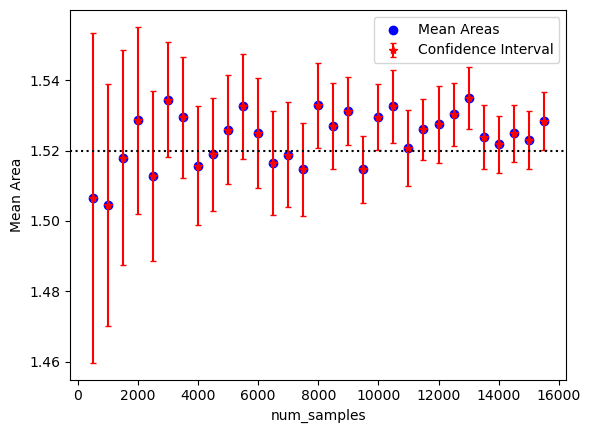

In [293]:
plt.scatter(num_samples_anti, mean_ev_anti, label='Mean Areas', color='blue')
plt.errorbar(num_samples_anti, mean_ev_anti, yerr=ci_ev_anti, fmt='*', color='red', capsize=2, label='Confidence Interval')
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel('num_samples')
plt.ylabel('Mean Area')
plt.legend()
